4422102/4422102 [==============================] - 1s 0us/step
Accuracy: 0.8798


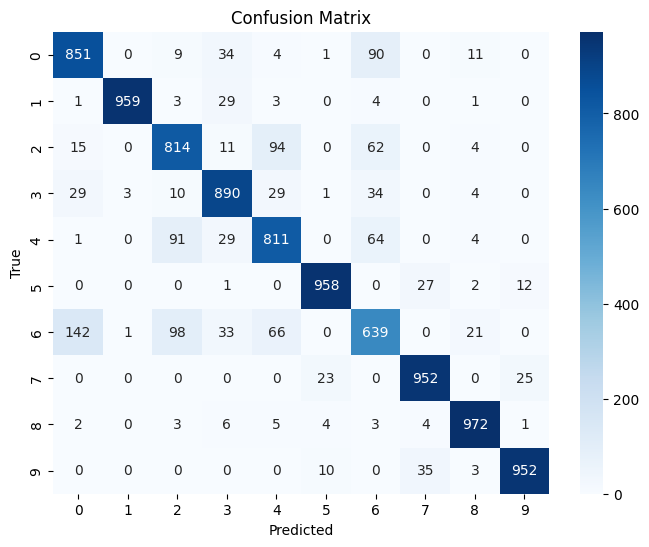

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.83      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.79      0.81      0.80      1000
       Dress       0.86      0.89      0.88      1000
        Coat       0.80      0.81      0.81      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.71      0.64      0.67      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from tensorflow import keras

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Flatten the images
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split the data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# RBF kernel SVM model
rbf_svm = SVC(kernel='rbf', gamma='auto', C=1.0)

# Train the model
rbf_svm.fit(x_train, y_train)

# Predictions
y_pred = rbf_svm.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Display classification report
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)
